# **Achievement No. 6: Advanced Analytics and Dashboard Design (V)**

## 2026 QS World University Rankings

### **Contents**

##### 1) Importing libraries

##### 2) Importing the data set

##### 3) The elbow technique

##### 4) K-means clustering

##### 5) Visualizations of different variables against each other

##### 6) Descriptive stats and discussion

### **1) Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from kneed import KneeLocator

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

### **2) Importing the data set**

In [3]:
path = r'C:\Users\andd0\Documents\Jupyter_Advanced Analytics and Dashboard Design'

In [4]:
df_2026_ranking = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Advanced Analytics and Dashboard Design (III).csv'), index_col = False)

In [5]:
df_2026_ranking.shape

(1501, 32)

In [6]:
df_2026_ranking.head()

,Unnamed: 0.1,Unnamed: 0,2026 Rank,Previous Rank,Institution Name,Country/Territory,Region,Size,Focus,Research,...,ISR RANK,ISD SCORE,ISD RANK,IRN SCORE,IRN RANK,EO SCORE,EO RANK,SUS SCORE,SUS RANK,Overall SCORE
0,0,0,1,1,Massachusetts Institute of Technology (MIT),United States of America,Americas,M,CO,VH,...,153,92.3,130,94.1,98,100.0,7,93.8,33,100.0
1,1,1,2,2,Imperial College London,United Kingdom,Europe,L,FO,VH,...,35,100.0,22,97.5,28,95.9,68,98.3,7=,99.4
2,2,2,3,6,Stanford University,United States of America,Americas,L,FC,VH,...,261,76.1,230,96.5,49,100.0,2,95.4,19=,98.9
3,3,3,4,3,University of Oxford,United Kingdom,Europe,L,FC,VH,...,80,98.7,67,100.0,1,100.0,3,77.9,198=,97.9
4,4,4,5,4,Harvard University,United States of America,Americas,L,FC,VH,...,217,60.6,335,99.4,8,100.0,1,77.8,201=,97.7


In [7]:
# Dropping categorical and columns that I won't use

df_2026_ranking_k = df_2026_ranking.drop(columns = 
                                         ['Unnamed: 0.1', 'Unnamed: 0', '2026 Rank', 'Previous Rank', 'Institution Name', 'Country/Territory', 
                                          'Region', 'Size', 'Focus', 'Research', 'Status', 'AR RANK', 'ER RANK', 'FSR RANK', 'CPF RANK', 'IFR SCORE',
                                          'IFR RANK', 'ISR SCORE', 'ISR RANK', 'ISD SCORE', 'ISD RANK', 'IRN SCORE', 'IRN RANK', 'EO RANK', 'SUS SCORE', 'SUS RANK', 'Overall SCORE'])

In [8]:
df_2026_ranking_k.head()

,AR SCORE,ER SCORE,FSR SCORE,CPF SCORE,EO SCORE
0,100.0,100.0,100.0,100.0,100.0
1,99.6,100.0,99.3,95.0,95.9
2,100.0,100.0,100.0,99.7,100.0
3,100.0,100.0,100.0,91.0,100.0
4,100.0,100.0,98.3,100.0,100.0


In [9]:
# I kept only the numerical columns with complete values

df_2026_ranking_k.isnull().sum()

AR SCORE     0
ER SCORE     0
FSR SCORE    0
CPF SCORE    0
EO SCORE     0
dtype: int64

In [10]:
# Renaming columns

df_2026_ranking_k.rename(columns = {
    'AR SCORE': 'Academic Reputation',
    'ER SCORE': 'Employer Reputation',
    'FSR SCORE': 'Faculty-Student Ratio',
    'CPF SCORE': 'Citations per Faculty',
    'EO SCORE': 'Employer Outcomes'
}, inplace = True)

In [11]:
df_2026_ranking_k.head()

,Academic Reputation,Employer Reputation,Faculty-Student Ratio,Citations per Faculty,Employer Outcomes
0,100.0,100.0,100.0,100.0,100.0
1,99.6,100.0,99.3,95.0,95.9
2,100.0,100.0,100.0,99.7,100.0
3,100.0,100.0,100.0,91.0,100.0
4,100.0,100.0,98.3,100.0,100.0


### **3) The elbow technique**

##### **What is it?**

##### The elbow technique shows the breaking point, or “elbow,” at which adding more clusters won’t help better explain the variances in the data.

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df_2026_ranking_k).score(df_2026_ranking_k) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\andd0\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\andd0\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\andd0\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\andd0\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\andd0\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _wina

[-5689507.350926048,
 -3459418.992254444,
 -2803796.288514813,
 -2257299.2186734816,
 -1899010.5915629996,
 -1731889.7471128306,
 -1584051.5604360304,
 -1483470.1938030864,
 -1395253.3442762063]

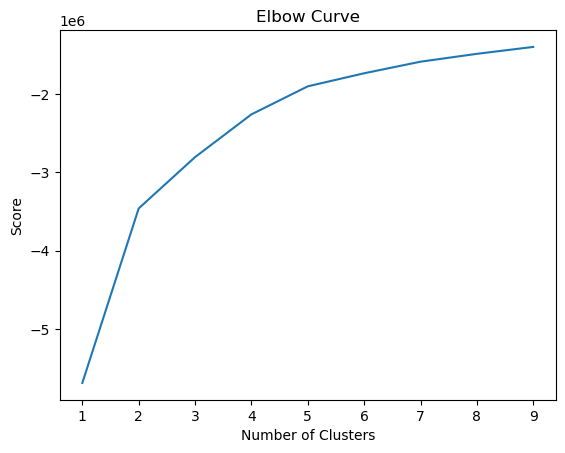

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### **4) K-means clustering**

##### **Note:** The choice below (3 clusters) is because I think it is easier to interpret than 5 clusters - which is what the visualization shows.

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(df_2026_ranking_k)

C:\Users\andd0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

In [17]:
df_2026_ranking_k['clusters'] = kmeans.fit_predict(df_2026_ranking_k)

C:\Users\andd0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


##### **New column attached to the dataframe with the resulting clusters:**

In [18]:
df_2026_ranking_k.head()

,Academic Reputation,Employer Reputation,Faculty-Student Ratio,Citations per Faculty,Employer Outcomes,clusters
0,100.0,100.0,100.0,100.0,100.0,0
1,99.6,100.0,99.3,95.0,95.9,0
2,100.0,100.0,100.0,99.7,100.0,0
3,100.0,100.0,100.0,91.0,100.0,0
4,100.0,100.0,98.3,100.0,100.0,0


In [19]:
df_2026_ranking_k['clusters'].value_counts()

clusters
1    884
2    317
0    300
Name: count, dtype: int64

### **5) Visualizations of different variables against each other**

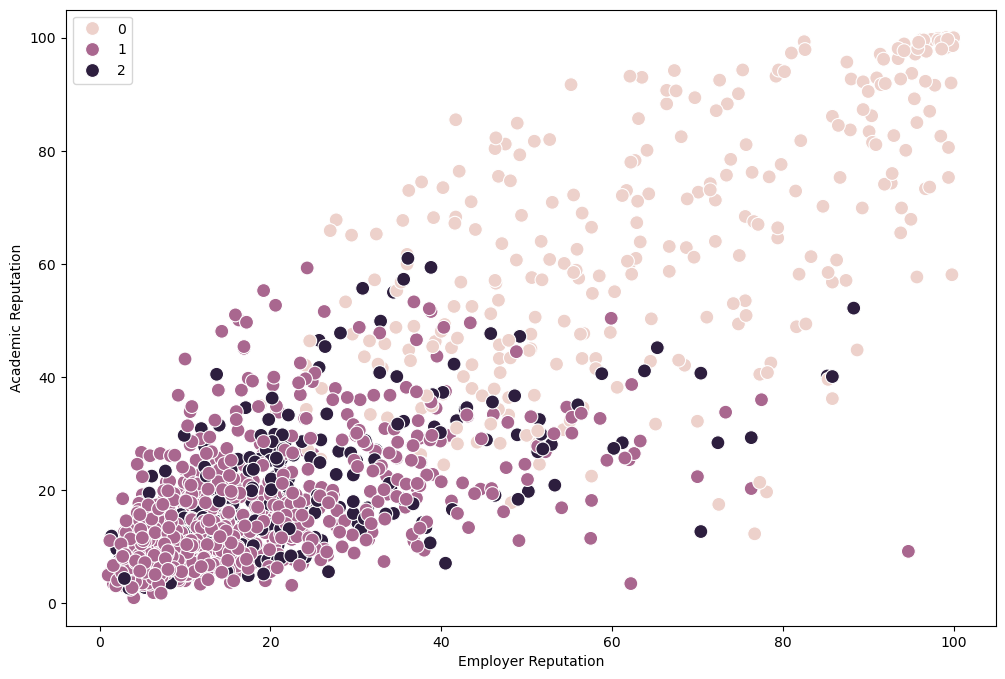

In [20]:
# Plot the clusters for the "Employer Reputation" and "Academic Reputation" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2026_ranking_k['Employer Reputation'], y=df_2026_ranking_k['Academic Reputation'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Employer Reputation') # Label x-axis.
plt.ylabel('Academic Reputation') # Label y-axis.
plt.show()

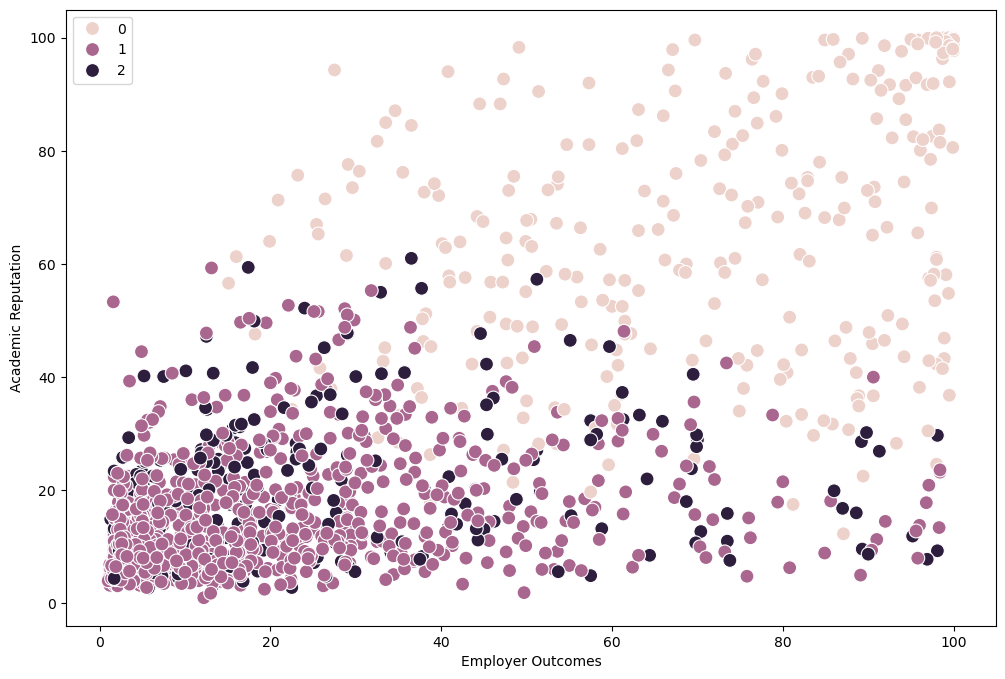

In [21]:
# Plot the clusters for the "Employer Outcomes" and "Academic Reputation" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2026_ranking_k['Employer Outcomes'], y=df_2026_ranking_k['Academic Reputation'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Employer Outcomes') # Label x-axis.
plt.ylabel('Academic Reputation') # Label y-axis.
plt.show()

In [22]:
df_2026_ranking_k.loc[df_2026_ranking_k['clusters'] == 2, 'cluster'] = 'dark purple'
df_2026_ranking_k.loc[df_2026_ranking_k['clusters'] == 1, 'cluster'] = 'purple'
df_2026_ranking_k.loc[df_2026_ranking_k['clusters'] == 0, 'cluster'] = 'pink'

##### **How and why do these clusters make sense?**

##### **AR vs ER**

##### The dark purple cluster (Legend 2) gathers the data points with the highest Employer Reputation and Academic Reputation. While a few data points below AR (y axis) = 60 mix with some data points of the other two clusters, I can clearly differentiate this cluster from the rest.

##### While the purple and pink clusters (legends 1 and 0 respectively) look crowded together, it's still possible to see how the purple cluster is more dense at the bottom. Also, the pink cluster has more data points between the other two clusters.

##### What can I conclude?

##### The trend 'the higher the employer reputation the higher the academic reputation' is clear. 

##### Some universities may have decent academic recognition but not as much employer pull (or vice versa). This explains why boundaries between clusters aren’t perfect.

##### **AR vs EO**

##### Here, only the highest (EO =< 80) and lowest (EO >= 20) Employer Outcomes seem to affect the Academic Reputation. All data points in the middle are way to scattered and do not show a clear trend.

##### While AR and ER follow a clear positive trend, AR and EO show weaker correlation. The extremes reveal meaningful groups (elite universities excel in both, weaker ones lag in both), but the middle range suggests that job market outcomes depend on more than just academic reputation.

### **6) Descriptive stats and discussion**

In [23]:
df_2026_ranking_k.groupby('cluster').agg({'Employer Reputation':['mean', 'median'], 
                         'Employer Outcomes':['mean', 'median'], 
                         'Academic Reputation':['mean', 'median']})

Employer Reputation        Employer Outcomes         \
                           mean median              mean median   
cluster                                                           
dark purple           19.988959  15.50         21.067192  12.00   
pink                  66.386333  64.85         70.431000  74.60   
purple                16.053054  11.90         19.464819  12.75   

            Academic Reputation         
                           mean median  
cluster                                 
dark purple           17.593375  14.20  
pink                  65.856667  66.25  
purple                15.125113  12.00

##### - Dark purple universities stand out. Their median ER (64.6) and AR (66.4) are far higher than the others. This suggests they are well recognized both by employers and academics, and their graduates likely perform strongly in the job market (median EO = 74.8).

##### - Pink universities are “middle ground.” Their scores are higher than the purple group but much lower than dark purple. They may have some recognition but are not seen as leading institutions.

##### - Purple universities are the lowest across all three measures (median ER = 11.9, AR = 12.0). This shows a group of universities with little recognition, both academically and with employers.

#### **What could these results be useful for in future steps of an analytics pipeline?**

##### - Predictive modeling: These clusters could be used to build models that predict a university’s Academic Reputation from other features like Employer Reputation or Employer Outcomes.

##### - Benchmarking: Universities could be benchmarked against their cluster to see if they are performing better or worse than peers.

##### - Strategic insights: If AR and ER are strongly linked but EO is weaker, this could guide future data collection — maybe EO needs to be measured differently, or maybe universities should focus more on reputation-building to improve outcomes.

In [26]:
df_2026_ranking_k.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_2026_ranking_clusters.csv'))